# Importing 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

# read data and combined

In [2]:
df1 = pd.read_csv('properati-MX-2016-11-01-properties-rent.csv')
df2 = pd.read_csv('properati-MX-2016-11-01-properties-sell.csv')
df_combined = pd.concat([df1, df2])
df_combined.to_csv('combined_file.csv',index=False)

In [3]:
df=pd.read_csv('combined_file.csv')


# preprocessing for data

In [4]:
df.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2013-09-19,rent,house,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.612709,-87.102987",20.612709,-87.102987,NaN,...,250.0,NaN,NaN,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #55546. Hermosa casa en el barrio C...,Casa en Alquiler. Ref. #55546. 3 Dormitorios. ...,https://thumbs-cf.properati.com/1/dLISoi0WStzf...
1,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626679,-87.075944",20.626679,-87.075944,2200.0,...,110.0,20.000000,20.000000,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o4...,Referencia #27985. Ático completamente amuebla...,Departamento en Alquiler. Ref. #27985. 2 Dormi...,https://thumbs-cf.properati.com/9/-DZ0FUVqgAnA...
2,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626729,-87.075858",20.626729,-87.075858,19000.0,...,110.0,11.380818,172.727273,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o5...,Referencia #27996. Departamento completamente ...,Departamento en Alquiler. Ref. #27996. 2 Dormi...,https://thumbs-cf.properati.com/4/dyZjLPbRTuui...
3,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.630104,-87.072484",20.630104,-87.072484,10000.0,...,65.0,10.136769,153.846154,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/ob...,Referencia #29065. Departamento perfecto para ...,Departamento en Alquiler. Ref. #29065. 1 Dormi...,https://thumbs-cf.properati.com/0/2tp0o2qIaZia...
4,2013-09-19,rent,store,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.635424,-87.077995",20.635424,-87.077995,30000.0,...,250.0,7.906680,120.000000,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #29386. Ubicado en uno de los princ...,Local en Alquiler. Ref. #29386. 250 m2. Local ...,https://thumbs-cf.properati.com/2/5L2Y9_OYAxNL...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188525 entries, 0 to 188524
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  188525 non-null  object 
 1   operation                   188525 non-null  object 
 2   property_type               188525 non-null  object 
 3   place_name                  188525 non-null  object 
 4   place_with_parent_names     188525 non-null  object 
 5   geonames_id                 1 non-null       float64
 6   lat-lon                     156591 non-null  object 
 7   lat                         156591 non-null  float64
 8   lon                         156591 non-null  float64
 9   price                       185911 non-null  float64
 10  currency                    185911 non-null  object 
 11  price_aprox_local_currency  185911 non-null  float64
 12  price_aprox_usd             185911 non-null  float64
 13  surface_total_

In [6]:
pd.set_option('display.max_columns',None)
df

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2013-09-19,rent,house,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.612709,-87.102987",20.612709,-87.102987,NaN,NaN,NaN,NaN,250.0,250.0,NaN,NaN,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #55546. Hermosa casa en el barrio C...,Casa en Alquiler. Ref. #55546. 3 Dormitorios. ...,https://thumbs-cf.properati.com/1/dLISoi0WStzf...
1,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626679,-87.075944",20.626679,-87.075944,2200.0,USD,41378.70,2200.00,110.0,110.0,20.000000,20.000000,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o4...,Referencia #27985. Ático completamente amuebla...,Departamento en Alquiler. Ref. #27985. 2 Dormi...,https://thumbs-cf.properati.com/9/-DZ0FUVqgAnA...
2,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.626729,-87.075858",20.626729,-87.075858,19000.0,ARS,23546.17,1251.89,110.0,110.0,11.380818,172.727273,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/o5...,Referencia #27996. Departamento completamente ...,Departamento en Alquiler. Ref. #27996. 2 Dormi...,https://thumbs-cf.properati.com/4/dyZjLPbRTuui...
3,2013-09-19,rent,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.630104,-87.072484",20.630104,-87.072484,10000.0,ARS,12392.73,658.89,65.0,65.0,10.136769,153.846154,NaN,NaN,NaN,http://nuevo-centro-urbano.properati.com.mx/ob...,Referencia #29065. Departamento perfecto para ...,Departamento en Alquiler. Ref. #29065. 1 Dormi...,https://thumbs-cf.properati.com/0/2tp0o2qIaZia...
4,2013-09-19,rent,store,Playa del Carmen,|México|Quintana Roo|Solidaridad|Playa del Car...,NaN,"20.635424,-87.077995",20.635424,-87.077995,30000.0,ARS,37178.19,1976.67,250.0,250.0,7.906680,120.000000,NaN,NaN,NaN,http://playa-del-carmen-playa-del-carmen.prope...,Referencia #29386. Ubicado en uno de los princ...,Local en Alquiler. Ref. #29386. 250 m2. Local ...,https://thumbs-cf.properati.com/2/5L2Y9_OYAxNL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188520,2016-10-31,sell,house,La Paz,|México|Baja California Sur|La Paz|,NaN,"24.1449619993,-110.3373348713",24.144962,-110.337335,130000.0,USD,2445105.00,130000.00,246.0,130.0,528.455285,1000.000000,NaN,NaN,NaN,http://la-paz-baja-california-sur.properati.co...,"<p>* La propiedad cuenta con 3 recámaras, 2 ba...",HERMOSA CASA FRACCIONAMIENTO JUAREZ (LA POSADA),https://thumbs-cf.properati.com/6/sqpYXMCYQ1yR...
188521,2016-10-31,sell,house,La Paz,|México|Baja California Sur|La Paz|,NaN,"24.0917019757,-110.3180873394",24.091702,-110.318087,535000.0,MXN,530160.07,28187.26,140.0,60.0,201.337571,8916.666667,NaN,NaN,NaN,http://la-paz-baja-california-sur.properati.co...,<p>casa de 2 recamaras con terreno amplio.tota...,casa misión de san Fernando,https://thumbs-cf.properati.com/3/VTZ1ofnuWV5r...
188522,2016-10-31,sell,apartment,Temozon Norte,|México|Yucatán|Mérida|Temozon Norte|,NaN,"21.065001,-89.6239875",21.065001,-89.623987,950000.0,MXN,941405.86,50052.15,0.0,63.0,NaN,15079.365079,NaN,NaN,NaN,http://temozon-norte.properati.com.mx/re55_ven...,<p>ECO TEMOZÓN LUXURY SUITES<br></p><p>Es una ...,ECO TEMOZON LUXURY SUITES,https://thumbs-cf.properati.com/5/9LAeSx0VAKe-...
188523,2016-11-01,sell,house,Michoacán,|México|Chiapas|Jiquipilas|Michoacán|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,180.0,NaN,NaN,NaN,NaN,NaN,http://michoacan-jiquipilas.properati.com.mx/r...,<p>Casa nueva en Villas de San Antonio<br></p>...,Villas de San Antonio 1,https://thumbs-cf.properati.com/1/-mzye3xCs53_...


In [7]:
df.isnull().sum()

created_on                         0
operation                          0
property_type                      0
place_name                         0
place_with_parent_names            0
geonames_id                   188524
lat-lon                        31934
lat                            31934
lon                            31934
price                           2614
currency                        2614
price_aprox_local_currency      2614
price_aprox_usd                 2614
surface_total_in_m2            90894
surface_covered_in_m2           7443
price_usd_per_m2              110834
price_per_m2                   21170
floor                         159810
rooms                         182449
expenses                      188318
properati_url                      0
description                        0
title                              0
image_thumbnail                 5522
dtype: int64

# droping unwanted columns

In [8]:
df.drop(["geonames_id","lat-lon","lat","lon","price_usd_per_m2","floor","rooms","expenses","properati_url","description","image_thumbnail","title","surface_total_in_m2"],inplace=True,axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188525 entries, 0 to 188524
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  188525 non-null  object 
 1   operation                   188525 non-null  object 
 2   property_type               188525 non-null  object 
 3   place_name                  188525 non-null  object 
 4   place_with_parent_names     188525 non-null  object 
 5   price                       185911 non-null  float64
 6   currency                    185911 non-null  object 
 7   price_aprox_local_currency  185911 non-null  float64
 8   price_aprox_usd             185911 non-null  float64
 9   surface_covered_in_m2       181082 non-null  float64
 10  price_per_m2                167355 non-null  float64
dtypes: float64(5), object(6)
memory usage: 15.8+ MB


In [10]:
df.isnull().sum()

created_on                        0
operation                         0
property_type                     0
place_name                        0
place_with_parent_names           0
price                          2614
currency                       2614
price_aprox_local_currency     2614
price_aprox_usd                2614
surface_covered_in_m2          7443
price_per_m2                  21170
dtype: int64

# fill NULLS

In [11]:
df.dropna(inplace=True,axis=0)

In [12]:
df.shape

(167355, 11)

In [13]:
mode=df['price'].mode()
df['price'] =  df['price'].fillna(mode[0])
mode=df['currency'].mode()
df['currency'] =  df['currency'].fillna(mode[0])

In [14]:
mode=df['price_aprox_local_currency'].mode()
df['price_aprox_local_currency'] =  df['price_aprox_local_currency'].fillna(mode[0])
mode=df['price_aprox_usd'].mode()
df['price_aprox_usd'] =  df['price_aprox_usd'].fillna(mode[0])

In [15]:
mode=df['surface_covered_in_m2'].mode()
df['surface_covered_in_m2'] =  df['surface_covered_in_m2'].fillna(mode[0])

In [16]:
df.isnull().sum()

created_on                    0
operation                     0
property_type                 0
place_name                    0
place_with_parent_names       0
price                         0
currency                      0
price_aprox_local_currency    0
price_aprox_usd               0
surface_covered_in_m2         0
price_per_m2                  0
dtype: int64

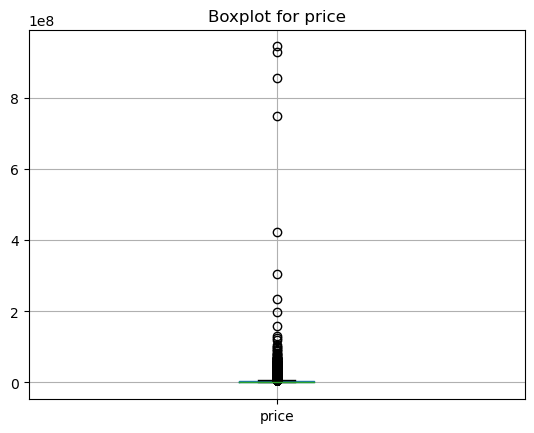

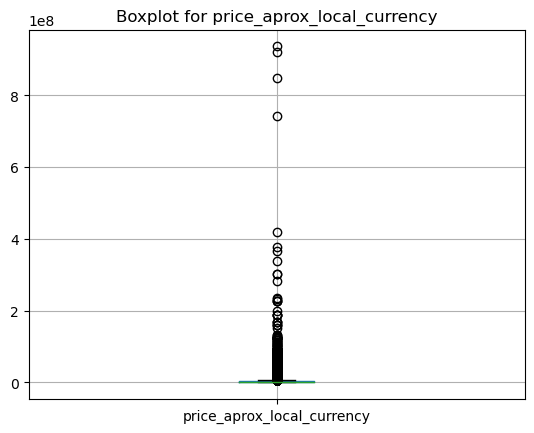

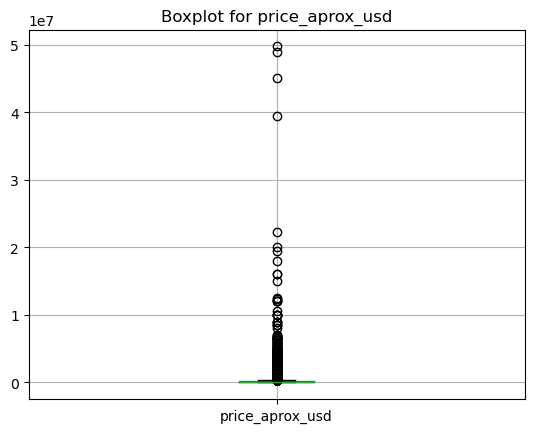

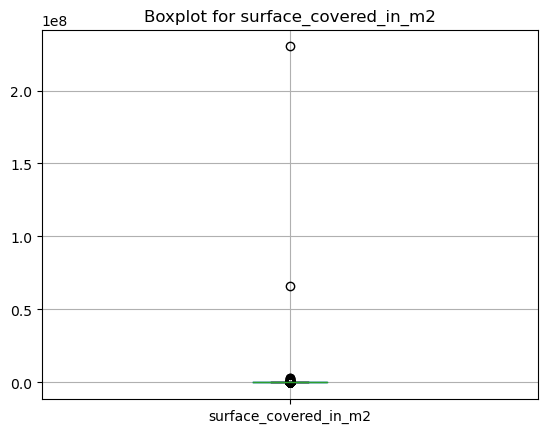

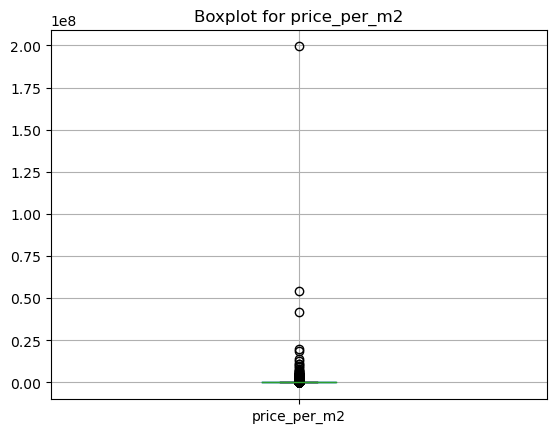

In [17]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        plt.figure()
        df.boxplot(column=[column])
        plt.title('Boxplot for ' + column)

plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167355 entries, 1 to 188524
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  167355 non-null  object 
 1   operation                   167355 non-null  object 
 2   property_type               167355 non-null  object 
 3   place_name                  167355 non-null  object 
 4   place_with_parent_names     167355 non-null  object 
 5   price                       167355 non-null  float64
 6   currency                    167355 non-null  object 
 7   price_aprox_local_currency  167355 non-null  float64
 8   price_aprox_usd             167355 non-null  float64
 9   surface_covered_in_m2       167355 non-null  float64
 10  price_per_m2                167355 non-null  float64
dtypes: float64(5), object(6)
memory usage: 15.3+ MB


# Questions

#### 1-Is there a correlation between the price and the surface_covered_in_m2 of the properties?

In [19]:
df['price'].corr(df['surface_covered_in_m2'])

0.00038758512034633866

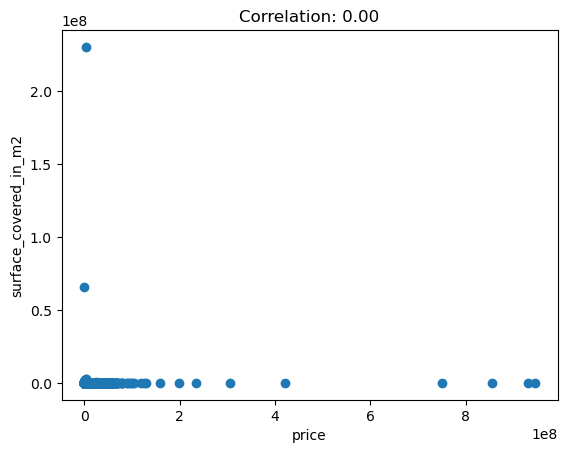

In [20]:
correlation = df['price'].corr(df['surface_covered_in_m2'])
plt.scatter(df['price'], df['surface_covered_in_m2'])
plt.xlabel('price')
plt.ylabel('surface_covered_in_m2')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

#### 2-Is there a correlation between the price and the price_aprox_local_currency of the properties?

In [21]:
df['price'].corr(df['price_aprox_local_currency'])

0.7717968000864023

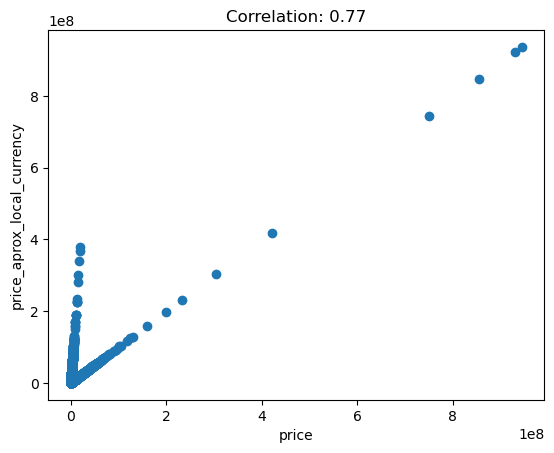

In [22]:
correlation = df['price'].corr(df['price_aprox_local_currency'])
plt.scatter(df['price'], df['price_aprox_local_currency'])
plt.xlabel('price')
plt.ylabel('price_aprox_local_currency')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

#### 3-Is there a correlation between the price and the price_aprox_usd  of the properties?

In [23]:
df['price'].corr(df['price_aprox_usd'])

0.7717968001269009

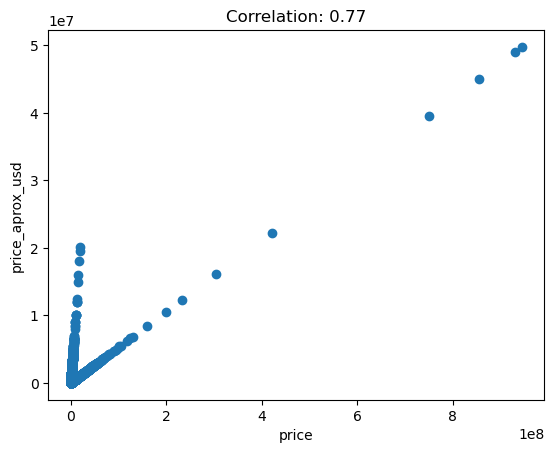

In [24]:
correlation = df['price'].corr(df['price_aprox_usd'])
plt.scatter(df['price'], df['price_aprox_usd'])
plt.xlabel('price')
plt.ylabel('price_aprox_usd')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

#### 4-Is there a correlation between the price and the price_per_m2  covered of the properties?

In [25]:
df['price'].corr(df['price_per_m2'])

0.1485195311989366

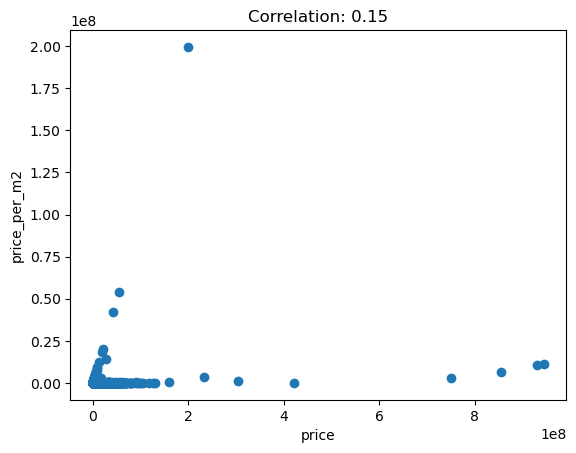

In [26]:
correlation = df['price'].corr(df['price_per_m2'])
plt.scatter(df['price'], df['price_per_m2'])
plt.xlabel('price')
plt.ylabel('price_per_m2')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

#### 5-Is there a correlation between the price_aprox_local_currency and the price_aprox_usd  of the properties?

In [27]:
df['price_aprox_local_currency'].corr(df['price_aprox_usd'])

0.9999999999999956

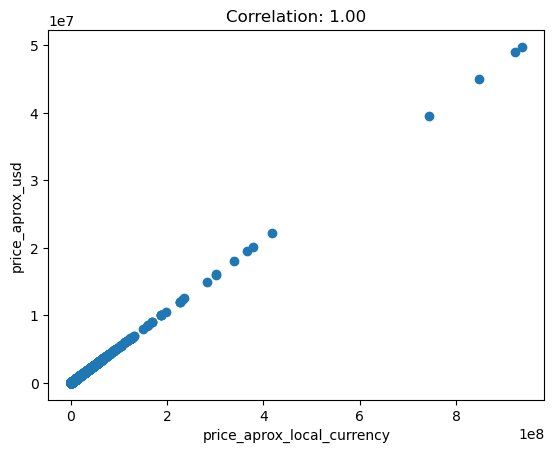

In [28]:
correlation = df['price_aprox_local_currency'].corr(df['price_aprox_usd'])
plt.scatter(df['price_aprox_local_currency'], df['price_aprox_usd'])
plt.xlabel('price_aprox_local_currency')
plt.ylabel('price_aprox_usd')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

#### 6-Is there a correlation between the price_aprox_local_currency and the surface_covered_in_m2  of the properties?

In [29]:
df['price_aprox_local_currency'].corr(df['surface_covered_in_m2'])

0.00010385173964101451

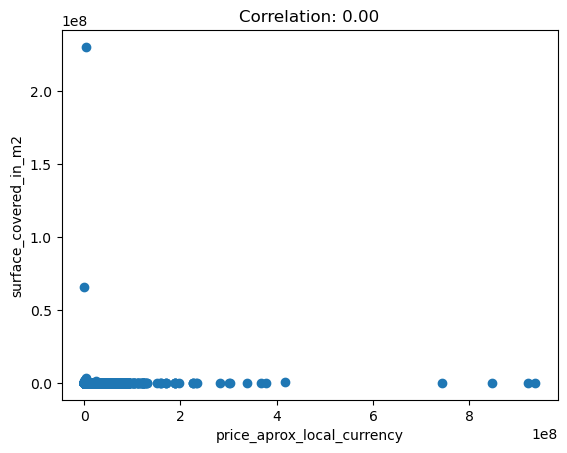

In [30]:
correlation = df['price_aprox_local_currency'].corr(df['surface_covered_in_m2'])
plt.scatter(df['price_aprox_local_currency'], df['surface_covered_in_m2'])
plt.xlabel('price_aprox_local_currency')
plt.ylabel('surface_covered_in_m2')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

#### 7-Is there a correlation between the price_aprox_local_currency and the price_per_m2 of the properties?

In [31]:
df['price_aprox_local_currency'].corr(df['price_per_m2'])

0.11470488023931207

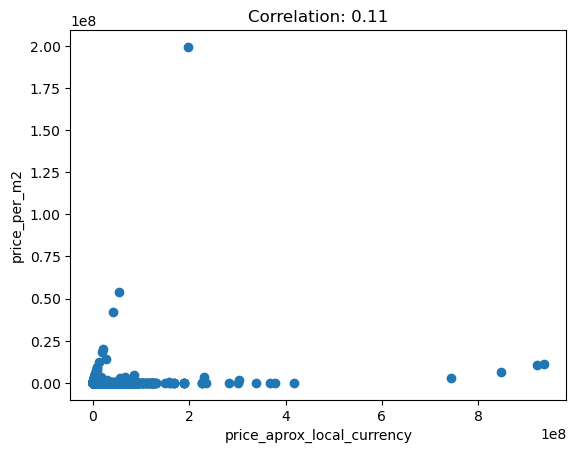

In [32]:
correlation = df['price_aprox_local_currency'].corr(df['price_per_m2'])
plt.scatter(df['price_aprox_local_currency'], df['price_per_m2'])
plt.xlabel('price_aprox_local_currency')
plt.ylabel('price_per_m2')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

#### 8-Is there a correlation between the price_aprox_usd and the surface_covered_in_m2 of the properties?

In [33]:
df['price_aprox_usd'].corr(df['surface_covered_in_m2'])

0.00010385173939899089

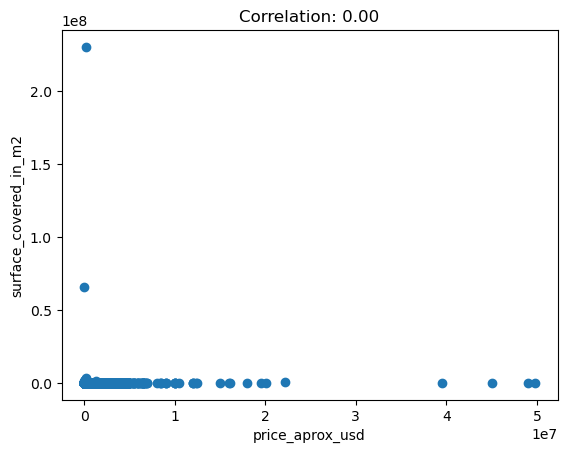

In [34]:
correlation = df['price_aprox_usd'].corr(df['surface_covered_in_m2'])
plt.scatter(df['price_aprox_usd'], df['surface_covered_in_m2'])
plt.xlabel('price_aprox_usd')
plt.ylabel('surface_covered_in_m2')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

#### 9-Is there a correlation between the price_aprox_usd and the price_per_m2 of the properties?

In [35]:
df['price_aprox_usd'].corr(df['price_per_m2'])

0.1147048802439289

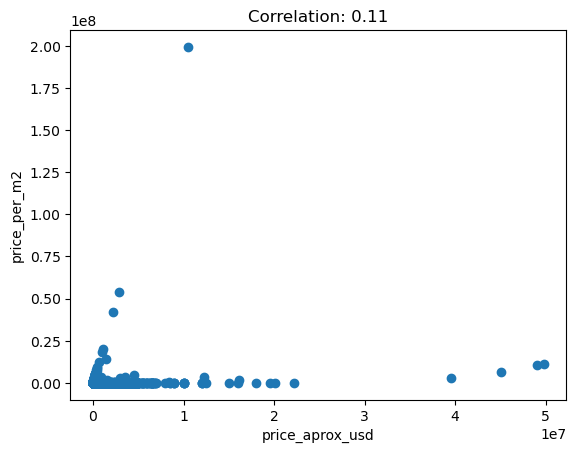

In [36]:
correlation = df['price_aprox_usd'].corr(df['price_per_m2'])
plt.scatter(df['price_aprox_usd'], df['price_per_m2'])
plt.xlabel('price_aprox_usd')
plt.ylabel('price_per_m2')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

#### 10-Is there a correlation between the surface_covered_in_m2  and the price_per_m2 of the properties?

In [37]:
df['surface_covered_in_m2'].corr(df['price_per_m2'])

-0.00010355426582719143

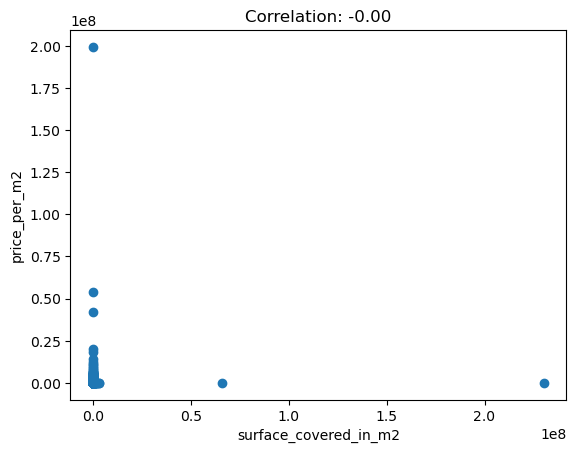

In [38]:
correlation = df['surface_covered_in_m2'].corr(df['price_per_m2'])
plt.scatter(df['surface_covered_in_m2'], df['price_per_m2'])
plt.xlabel('surface_covered_in_m2')
plt.ylabel('price_per_m2')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

#### correlation 

In [39]:
df.corr()

,price,price_aprox_local_currency,price_aprox_usd,surface_covered_in_m2,price_per_m2
price,1.000000,0.771797,0.771797,0.000388,0.148520
price_aprox_local_currency,0.771797,1.000000,1.000000,0.000104,0.114705
price_aprox_usd,0.771797,1.000000,1.000000,0.000104,0.114705
surface_covered_in_m2,0.000388,0.000104,0.000104,1.000000,-0.000104
price_per_m2,0.148520,0.114705,0.114705,-0.000104,1.000000


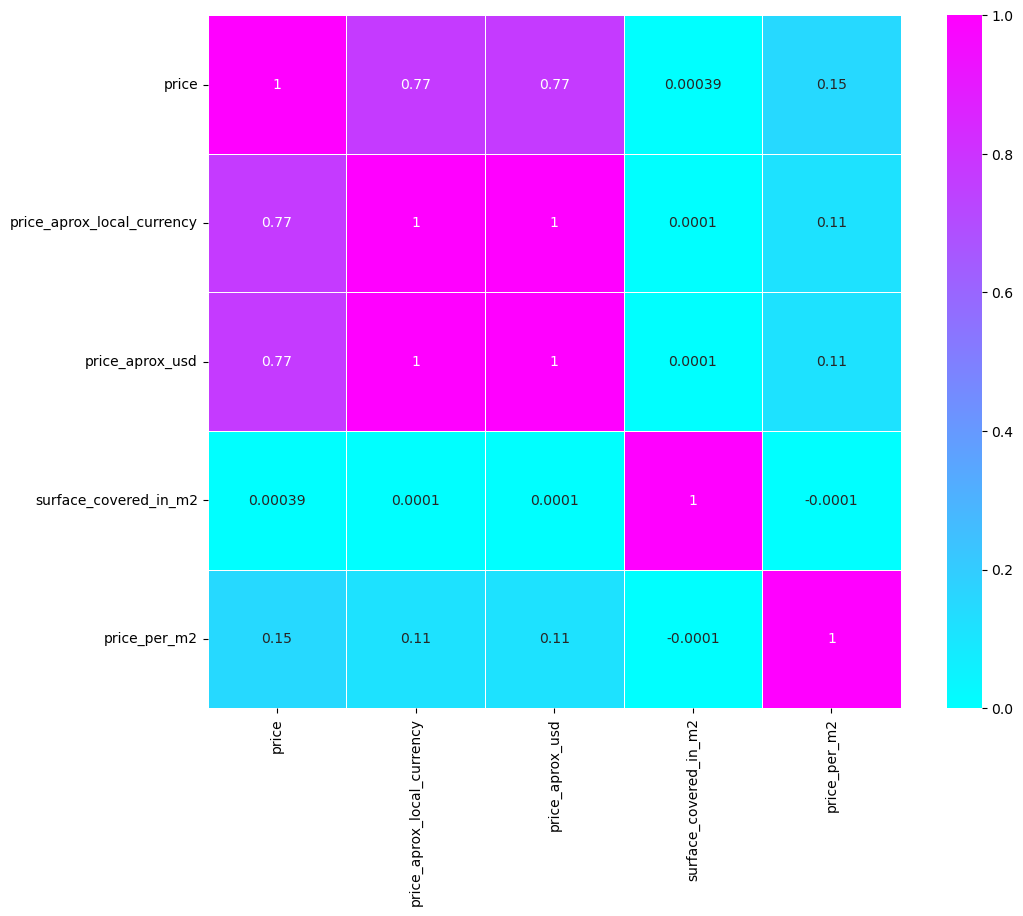

In [40]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cmap="cool", square=True,linewidths=.5, annot=True)
plt.show()

# Quistions

### 1. What is the average price of a property in this dataset?

In [41]:
df['price'].mean()


2566323.9967195485

### 2.How many properties are for rent versus for sale?


In [42]:
property_counts = df['operation'].value_counts()
property_counts

sell    137284
rent     30071
Name: operation, dtype: int64

### 3.Which property type has the highest average price?

In [43]:
avg_price_per_type = df.groupby('property_type')['price'].mean()
avg_price_per_type

property_type
PH           3.020615e+06
apartment    2.000038e+06
house        2.886162e+06
store        1.313201e+06
Name: price, dtype: float64

### 4.What is the most common property type in this dataset?

In [44]:
most_common_type = df['property_type'].mode()[0]
most_common_type

'house'

### 5.Which city or neighborhood has the highest average property price?

In [45]:
avg_price_per_place = df.groupby('place_name')['price'].mean()
avg_price_per_place.head(10)

place_name
10 de Abril             3.500000e+03
13 de Mayo              3.500000e+05
14 de Septiembre        2.245000e+06
16 de Septiembre        1.700000e+06
16 de Septiembre Sur    2.086000e+06
17 de Abril             8.500000e+05
17 de Mayo              8.533333e+05
18 de Marzo             9.438000e+03
19 de Noviembre         3.800000e+05
1ro de Enero            2.100000e+06
Name: price, dtype: float64

### 6.What is themedian price per square meter in this dataset?

In [46]:
median_price_per_sqm = df['price_per_m2'].median()
median_price_per_sqm

9914.529914529914

### 7.What is the minimum price of a property in this dataset?

In [47]:
min_price = df['price'].min()
min_price

50.0

### 8.What is the maximum price of a property in this dataset?

In [48]:
max_price = df['price'].max()
max_price

945000000.0

### 9.What is the average price per square meter in this dataset?

In [49]:
avg_price_per_sqm = df['price_per_m2'].mean()
avg_price_per_sqm

16204.667318972372

### 10.How many properties are listed in each currency?

In [50]:
property_counts_per_currency = df['currency'].value_counts()
property_counts_per_currency 

MXN    158445
USD      8885
ARS        24
CLP         1
Name: currency, dtype: int64

### 11.What is the total number of properties in this dataset?

In [51]:
total_properties = df.shape[0]
total_properties

167355

### 12.What is the most expensive property in this dataset?

In [52]:
most_expensive_property = df.loc[df['price'].idxmax()]
most_expensive_property

created_on                                                           2016-08-28
operation                                                                  sell
property_type                                                             house
place_name                                                             Veracruz
place_with_parent_names       |México|Veracruz de Ignacio de la Llave|Veracruz|
price                                                               945000000.0
currency                                                                    MXN
price_aprox_local_currency                                         936451275.35
price_aprox_usd                                                     49788727.19
surface_covered_in_m2                                                      85.0
price_per_m2                                                    11117647.058824
Name: 131230, dtype: object

### 13.What is the cheapest property in this dataset?

In [53]:
cheapest_property = df.loc[df['price'].idxmin()]
cheapest_property

created_on                                                  2015-10-29
operation                                                         rent
property_type                                                    store
place_name                                              Miguel Hidalgo
place_with_parent_names       |México|Distrito Federal|Miguel Hidalgo|
price                                                             50.0
currency                                                           USD
price_aprox_local_currency                                      940.42
price_aprox_usd                                                   50.0
surface_covered_in_m2                                            347.0
price_per_m2                                                  0.144092
Name: 5904, dtype: object

### 14.What is the most common currency used in this dataset?

In [54]:
most_common_currency = df['currency'].mode()[0]
most_common_currency

'MXN'

### 15.How many properties are listed in each property type?

In [55]:
property_counts_per_type = df['property_type'].value_counts()
property_counts_per_type

house        114457
apartment     43210
store          9687
PH                1
Name: property_type, dtype: int64

### 16.How many properties are listed in each city or neighborhood?

In [56]:
property_counts_per_place = df['place_name'].value_counts()
property_counts_per_place

Veracruz                     8595
Querétaro                    7812
Mérida                       7597
Cuernavaca                   5965
Benito Juárez                5232
                             ... 
Apaseo el Alto                  1
Foresta                         1
Villas de Santa María           1
San Miguel de La Victoria       1
Tekax                           1
Name: place_name, Length: 3685, dtype: int64

### 17.What is the average price of a property per city or neighborhood?

In [57]:
avg_price_per_place = df.groupby(['place_name','operation'])['price'].mean()
avg_price_per_place

place_name            operation
10 de Abril           rent         3.500000e+03
13 de Mayo            sell         3.500000e+05
14 de Septiembre      sell         2.245000e+06
16 de Septiembre      sell         1.700000e+06
16 de Septiembre Sur  sell         2.086000e+06
                                       ...     
Álamo Oriente         sell         5.500000e+05
Álamo Rustico         sell         9.000000e+05
Álvarez del Castillo  sell         1.580000e+06
Álvaro Obregón        rent         3.443704e+04
                      sell         5.493696e+06
Name: price, Length: 4621, dtype: float64

### 18.What is the average price of a property per property type?

In [58]:
avg_price_per_type = df.groupby(['property_type','operation'])['price'].mean()
avg_price_per_type

property_type  operation
PH             sell         3.020615e+06
apartment      rent         1.797512e+04
               sell         2.610920e+06
house          rent         1.929114e+04
               sell         3.261172e+06
store          rent         2.853514e+04
               sell         4.127533e+06
Name: price, dtype: float64

### 19.What is the average price of a property per operation type (rent or sale)?

In [60]:
avg_price_per_operation = df.groupby('operation')['price'].mean()
avg_price_per_operation

operation
rent    2.089018e+04
sell    3.123882e+06
Name: price, dtype: float64

### 20.What is the average price per square meter per property type?

In [61]:
avg_price_sqm_per_type = df.groupby(['property_type','operation'])['price_per_m2'].mean()
avg_price_sqm_per_type

property_type  operation
PH             sell         47946.269841
apartment      rent           240.109757
               sell         23870.181797
house          rent           242.139058
               sell         18098.327686
store          rent           240.672270
               sell         27780.851449
Name: price_per_m2, dtype: float64

### 21.What is the average price per square meter per city or neighborhood?

In [62]:
avg_price_sqm_per_place = df.groupby(['place_name', 'operation'])['price_per_m2'].mean()
avg_price_sqm_per_place

place_name            operation
10 de Abril           rent            77.777778
13 de Mayo            sell          7777.777778
14 de Septiembre      sell          9546.875000
16 de Septiembre      sell         24285.714286
16 de Septiembre Sur  sell          8977.962213
                                       ...     
Álamo Oriente         sell         10576.923077
Álamo Rustico         sell          6338.028169
Álvarez del Castillo  sell         12153.846154
Álvaro Obregón        rent           295.852405
                      sell         24149.792220
Name: price_per_m2, Length: 4621, dtype: float64

### 22.What is the average price per square meter per operation type?

In [63]:
avg_price_sqm_per_operation = df.groupby('operation')['price_per_m2'].mean()
avg_price_sqm_per_operation

operation
rent      241.127655
sell    19701.357401
Name: price_per_m2, dtype: float64

### 23. What is the median price per square meter per property type?

In [64]:
# Calculate the price per square meter
df['price_per_m2'] = df['price_aprox_usd'] / df['surface_covered_in_m2']

# Group the data by property type and calculate the median price per square meter
median_price_per_m2 = df.groupby('property_type')['price_per_m2'].median()
median_price_per_m2

property_type
PH           2585.959206
apartment     753.536135
house         543.719524
store          12.117805
Name: price_per_m2, dtype: float64

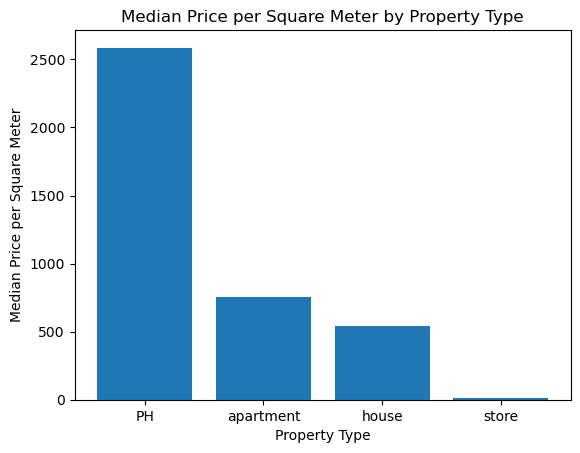

In [65]:
plt.bar(median_price_per_m2.index, median_price_per_m2.values)
plt.xlabel('Property Type')
plt.ylabel('Median Price per Square Meter')
plt.title('Median Price per Square Meter by Property Type')
plt.show()

### 25. What is the median price per square meter per city or neighborhood?

In [80]:
# Group the data by city or neighborhood and calculate the median price per square meter
median_price_per_m2 = df.groupby('place_name')['price_per_m2'].median()

median_price_per_m2

place_name
10 de Abril                4.210000
13 de Mayo               409.783556
14 de Septiembre         503.026203
16 de Septiembre        1279.528857
16 de Septiembre Sur     516.466184
                           ...     
Álamo Industrial         607.444118
Álamo Oriente            557.260769
Álamo Rustico            333.928380
Álvarez del Castillo     640.343385
Álvaro Obregón           874.371404
Name: price_per_m2, Length: 3685, dtype: float64

### 26. What is the median price per square meter per operation type?

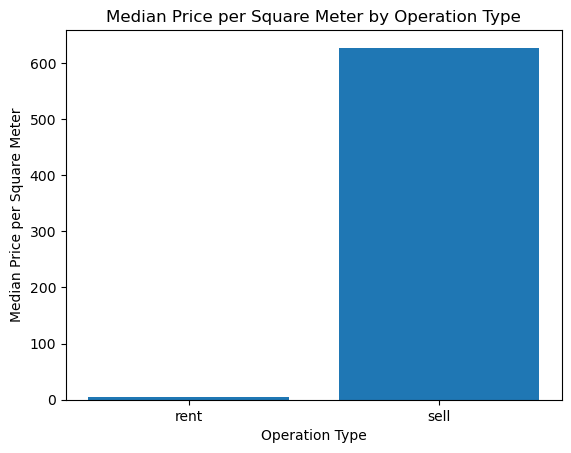

In [81]:

# Group the data by operation type and calculate the median price per square meter
median_price_per_m2 = df.groupby('operation')['price_per_m2'].median()

# Create a bar plot of the median price per square meter per operation type
plt.bar(median_price_per_m2.index, median_price_per_m2.values)
plt.xlabel('Operation Type')
plt.ylabel('Median Price per Square Meter')
plt.title('Median Price per Square Meter by Operation Type')
plt.show()

### 27. How many properties have a surface area greater than 100 square meters?

There are 118080 properties with a surface area greater than 100 square meters.


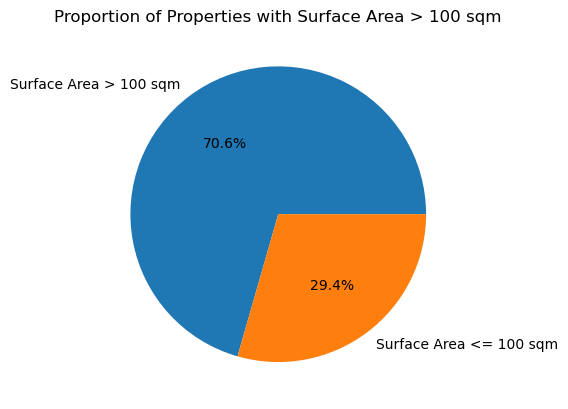

In [82]:
# Count the number of properties with a surface area greater than 100 square meters
num_properties = df[df['surface_covered_in_m2'] > 100].shape[0]

# Print the result
print(f'There are {num_properties} properties with a surface area greater than 100 square meters.')

# Create a pie chart to show the proportion of properties that have a surface area greater than 100 square meters
sizes = [num_properties, df.shape[0]-num_properties]
labels = ['Surface Area > 100 sqm', 'Surface Area <= 100 sqm']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Properties with Surface Area > 100 sqm')
plt.show()

### 28. How many properties have a surface area less than 50 square meters?

There are 6917 properties with a surface area less than 50 square meters.


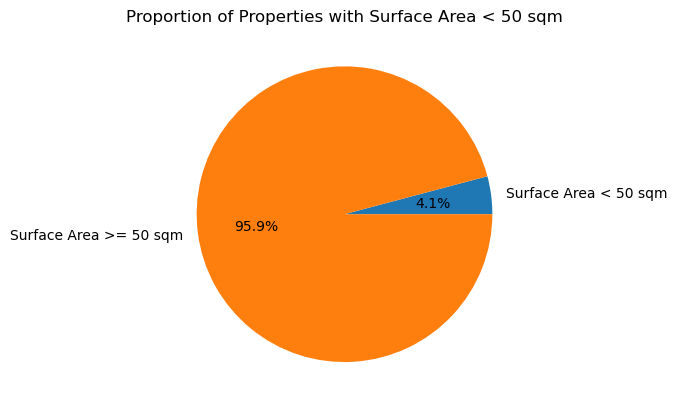

In [83]:
# Count the number of properties with a surface area less than 50 square meters
num_properties = df[df['surface_covered_in_m2'] < 50].shape[0]

# Print the result
print(f'There are {num_properties} properties with a surface area less than 50 square meters.')

# Create a pie chart to show the proportion of properties that have a surface area less than 50 square meters
sizes = [num_properties, df.shape[0]-num_properties]
labels = ['Surface Area < 50 sqm', 'Surface Area >= 50 sqm']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Properties with Surface Area < 50 sqm')
plt.show()

### 29. What is the average price per square meter for apartments?

The average price per square meter for apartments is 86.24 USD.


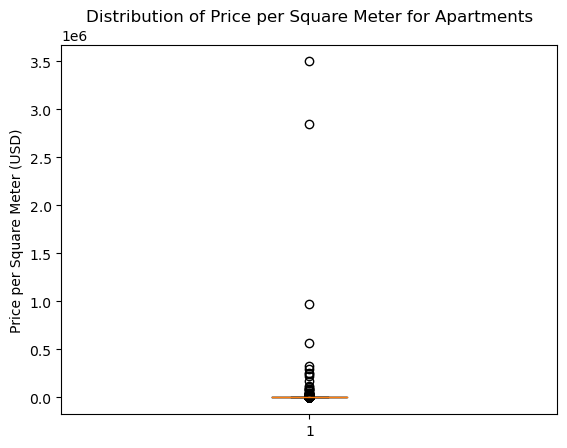

In [84]:
# Filter the data to include only apartments
apartments_df = df[df['property_type'] == 'apartment']

# Calculate the average price per square meter for apartments
avg_price_per_m2 = apartments_df['price_aprox_usd'].sum() / apartments_df['surface_covered_in_m2'].sum()

# Print the result
print(f'The average price per square meter for apartments is {avg_price_per_m2:.2f} USD.')

# Create a box plot to show the distribution of price per square meter for apartments
plt.boxplot(apartments_df['price_aprox_usd'] / apartments_df['surface_covered_in_m2'])
plt.title('Distribution of Price per Square Meter for Apartments')
plt.ylabel('Price per Square Meter (USD)')
plt.show()

### 30. How many properties have a price per square meter greater than $2000 USD?

There are 9149 properties with a price per square meter greater than $2000 USD.


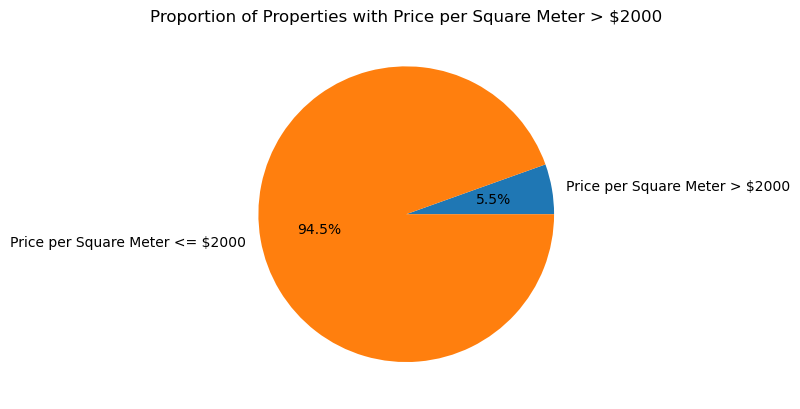

In [85]:

# Calculate the price per square meter
df['price_per_m2'] = df['price_aprox_usd'] / df['surface_covered_in_m2']

# Count the number of properties with a price per square meter greater than $2000 USD
num_properties = df[df['price_per_m2'] > 2000].shape[0]

# Print the result
print(f'There are {num_properties} properties with a price per square meter greater than $2000 USD.')

# Create a pie chart to show the proportion of properties that have a price per square meter greater than $2000 USD
sizes = [num_properties, df.shape[0]-num_properties]
labels = ['Price per Square Meter > $2000', 'Price per Square Meter <= $2000']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Properties with Price per Square Meter > $2000')
plt.show()

### 31. What is the average price per square meter for properties with a surface area between 50 and 100 square meters?

The average price per square meter for properties with a surface area between 50 and 100 square meters is 732.54 USD.


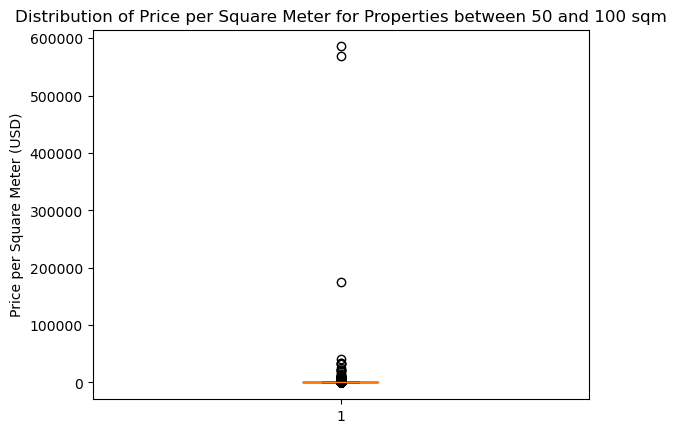

In [86]:
filtered_df = df[(df['surface_covered_in_m2'] >= 50) & (df['surface_covered_in_m2'] <= 100)]

# Calculate the average price per square meter for properties in this range
avg_price_per_m2 = filtered_df['price_aprox_usd'].sum() / filtered_df['surface_covered_in_m2'].sum()

# Print the result
print(f'The average price per square meter for properties with a surface area between 50 and 100 square meters is {avg_price_per_m2:.2f} USD.')

# Create a box plot to show the distribution of price per square meter for properties in this range
plt.boxplot(filtered_df['price_aprox_usd'] / filtered_df['surface_covered_in_m2'])
plt.title('Distribution of Price per Square Meter for Properties between 50 and 100 sqm')
plt.ylabel('Price per Square Meter (USD)')
plt.show()

###  32. How many properties are listed in each place_name?

In [87]:
# Group the data by place_name and count the number of properties in each group
count_by_country = df.groupby('place_name')['property_type'].count()
count_by_country

place_name
10 de Abril                1
13 de Mayo                 1
14 de Septiembre           2
16 de Septiembre           1
16 de Septiembre Sur       5
                        ... 
Álamo Industrial           1
Álamo Oriente              1
Álamo Rustico              1
Álvarez del Castillo       1
Álvaro Obregón          1727
Name: property_type, Length: 3685, dtype: int64

### 33. What is the average price per square meter for properties in each place_name?

In [88]:
# Calculate the price per square meter
df['price_per_m2'] = df['price_aprox_usd'] / df['surface_covered_in_m2']

# Group the data by place_name and calculate the average price per square meter for each group
avg_price_by_place = df.groupby(['place_name','operation'])['price_per_m2'].mean().sort_values(ascending=False)

# Print the result
print(avg_price_by_place)

place_name               operation
Ejido                    sell         474178.350000
Huichapan                sell          71733.780917
Puerto Morelos           sell          59191.354608
Carrizalejo              sell          30793.189110
San Antonio              sell          28531.578194
                                          ...      
Tepetitla de Lardizábal  rent              0.759880
Venta Grande             rent              0.752657
Avándaro                 rent              0.718545
Club Santiago            rent              0.460419
Sierra Papacal           rent              0.100352
Name: price_per_m2, Length: 4621, dtype: float64


### 34. What is the average price per square meter for properties in each city or neighborhood and property type combination?

In [89]:
# Calculate the price per square meter
df['price_per_m2'] = df['price_aprox_usd'] / df['surface_covered_in_m2']

# Group the data by place_name, property_type, and price_per_m2, and calculate the average price per square meter for each group
avg_price_by_place_and_type = df.groupby(['place_name', 'property_type'])['price_per_m2'].mean()

print(avg_price_by_place_and_type)

place_name            property_type
10 de Abril           apartment           4.210000
13 de Mayo            store             409.783556
14 de Septiembre      house             503.026203
16 de Septiembre      apartment        1279.528857
16 de Septiembre Sur  house             473.017236
                                          ...     
Álamo Rustico         house             333.928380
Álvarez del Castillo  store             640.343385
Álvaro Obregón        apartment        1152.435630
                      house            1123.267452
                      store             847.471585
Name: price_per_m2, Length: 5034, dtype: float64


### 35. What is the average price per square meter for properties in each operation type and property type combination?

In [90]:
# Calculate the price per square meter
df['price_per_m2'] = df['price_aprox_usd'] / df['surface_covered_in_m2']

# Group the data by operation_type, property_type, and price_per_m2, and calculate the average price per square meter for each group
avg_price_by_operation_and_type = df.groupby(['property_type','operation'])['price_per_m2'].mean()

print(avg_price_by_operation_and_type)

property_type  operation
PH             sell         2585.959206
apartment      rent           13.987101
               sell         1660.467590
house          rent           13.198872
               sell         1101.870683
store          rent           13.652618
               sell         3369.372750
Name: price_per_m2, dtype: float64


### 36. How many properties have a price per square meter less than the average price per square meter?

In [91]:
# Calculate the price per square meter
df['price_per_m2'] = df['price_aprox_usd'] / df['surface_covered_in_m2']

# Calculate the average price per square meter for all properties
avg_price_per_m2 = df['price_per_m2'].mean()

# Filter the data to include only properties with a price per square meter less than the average
filtered_df = df[df['price_per_m2'] < avg_price_per_m2]

# Count the number of properties in the filtered DataFrame
count = filtered_df.shape[0]

# Print the result
print(f'The number of properties with a price per square meter less than the average ({avg_price_per_m2:.2f} USD) is {count}.')

The number of properties with a price per square meter less than the average (1057.71 USD) is 139295.
